Note:

- CE = Cardioembolic
- LAA = Large Artery Atherosclerosis

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train=pd.read_csv("train.csv")

In [3]:
df_train

,image_id,center_id,patient_id,image_num,label
0,006388_0,11,006388,0,CE
1,008e5c_0,11,008e5c,0,CE
2,00c058_0,11,00c058,0,LAA
3,01adc5_0,11,01adc5,0,LAA
4,026c97_0,4,026c97,0,CE
...,...,...,...,...,...
749,fe9645_0,3,fe9645,0,CE
750,fe9bec_0,4,fe9bec,0,LAA
751,ff14e0_0,6,ff14e0,0,CE
752,ffec5c_0,7,ffec5c,0,LAA


In [4]:
df_train.shape

(754, 5)

In [5]:
df_train.head()

,image_id,center_id,patient_id,image_num,label
0,006388_0,11,006388,0,CE
1,008e5c_0,11,008e5c,0,CE
2,00c058_0,11,00c058,0,LAA
3,01adc5_0,11,01adc5,0,LAA
4,026c97_0,4,026c97,0,CE


In [6]:
df_test=pd.read_csv("test.csv")

In [7]:
df_test

,image_id,center_id,patient_id,image_num
0,006388_0,11,006388,0
1,008e5c_0,11,008e5c,0
2,00c058_0,11,00c058,0
3,01adc5_0,11,01adc5,0


In [8]:
df_test.shape

(4, 4)

In [9]:
df_test.head()

,image_id,center_id,patient_id,image_num
0,006388_0,11,006388,0
1,008e5c_0,11,008e5c,0
2,00c058_0,11,00c058,0
3,01adc5_0,11,01adc5,0


In [10]:
df_other=pd.read_csv("other.csv")

In [11]:
df_other

,image_id,patient_id,image_num,other_specified,label
0,01f2b3_0,01f2b3,0,NaN,Unknown
1,01f2b3_1,01f2b3,1,NaN,Unknown
2,02ebd5_0,02ebd5,0,NaN,Unknown
3,0412ab_0,0412ab,0,NaN,Unknown
4,04414e_0,04414e,0,Hypercoagulable,Other
...,...,...,...,...,...
391,faaa7e_0,faaa7e,0,NaN,Unknown
392,fd0f11_0,fd0f11,0,NaN,Unknown
393,fd0f11_1,fd0f11,1,NaN,Unknown
394,fd83c3_0,fd83c3,0,NaN,Unknown


In [12]:
df_other.shape

(396, 5)

In [13]:
df_other.head()

,image_id,patient_id,image_num,other_specified,label
0,01f2b3_0,01f2b3,0,NaN,Unknown
1,01f2b3_1,01f2b3,1,NaN,Unknown
2,02ebd5_0,02ebd5,0,NaN,Unknown
3,0412ab_0,0412ab,0,NaN,Unknown
4,04414e_0,04414e,0,Hypercoagulable,Other


In [14]:
#The nunique() method returns the number of unique values for each column.

train_patients = df_train['patient_id'].nunique()
test_patients = df_test['patient_id'].nunique()
other_patients = df_other['patient_id'].nunique()

print("train_patients: ", train_patients)
print("test_patients: ", test_patients)
print("other_patients: ", other_patients)

train_patients:  632
test_patients:  4
other_patients:  336


In [15]:
df_train['label'] = df_train['label'].replace({'CE':1, 'LAA':0})

In [16]:
df_train.head()

,image_id,center_id,patient_id,image_num,label
0,006388_0,11,006388,0,1
1,008e5c_0,11,008e5c,0,1
2,00c058_0,11,00c058,0,0
3,01adc5_0,11,01adc5,0,0
4,026c97_0,4,026c97,0,1


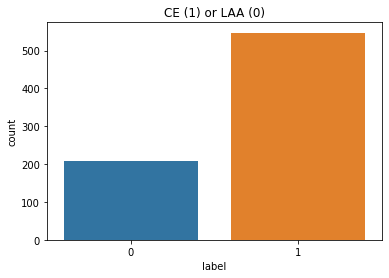

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.countplot(x = 'label', data = df_train)
ax.set_title("CE (1) or LAA (0)")

plt.show()

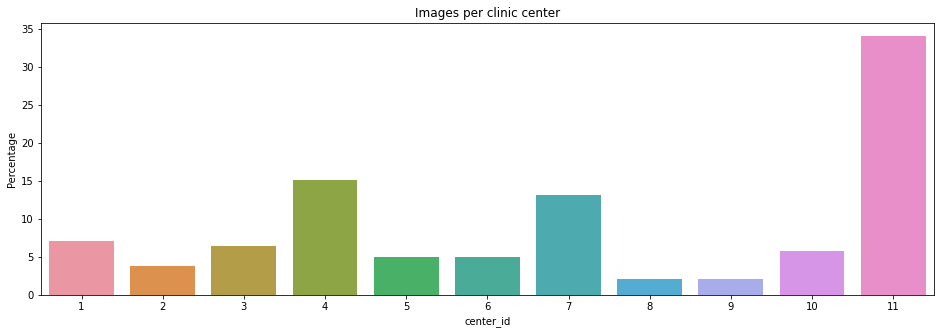

In [21]:
labels = df_train.groupby('label')['label'].count().div(len(df_train)).mul(100)
centers = df_train.groupby("center_id")['center_id'].count().div(len(df_train)).mul(100)

fig, ax = plt.subplots(figsize=(16,5))

sns.barplot(x=centers.index, y=centers.values)
ax.set_title("Images per clinic center"), ax.set_ylabel("Percentage")
plt.show()

In [25]:
import cv2
first_img = cv2.imread("0ed87f_0.tif")

In [26]:
first_img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [27]:
first_img.shape

(19149, 6285, 3)

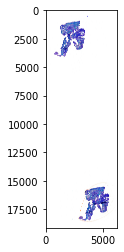

In [28]:
plt.imshow(first_img)

In [29]:
second_img = cv2.imread("1f018f_0.tif")

In [31]:
second_img

array([[[254, 216, 234],
        [254, 216, 234],
        [254, 216, 234],
        ...,
        [254, 216, 234],
        [254, 216, 234],
        [254, 216, 234]],

       [[254, 216, 234],
        [254, 216, 234],
        [254, 216, 234],
        ...,
        [254, 216, 234],
        [254, 216, 234],
        [254, 216, 234]],

       [[254, 216, 234],
        [254, 216, 234],
        [254, 216, 234],
        ...,
        [254, 216, 234],
        [254, 216, 234],
        [254, 216, 234]],

       ...,

       [[254, 216, 234],
        [254, 216, 234],
        [254, 216, 234],
        ...,
        [254, 216, 234],
        [254, 216, 234],
        [254, 216, 234]],

       [[254, 216, 234],
        [254, 216, 234],
        [254, 216, 234],
        ...,
        [254, 216, 234],
        [254, 216, 234],
        [254, 216, 234]],

       [[254, 216, 234],
        [254, 216, 234],
        [254, 216, 234],
        ...,
        [254, 216, 234],
        [254, 216, 234],
        [254, 216, 234]]

In [32]:
second_img.shape

(33068, 8579, 3)

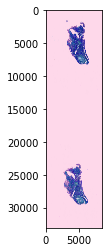

In [33]:
plt.imshow(second_img)

In [37]:
third_img = cv2.imread("20d5cf_0.tif")

In [38]:
third_img

array([[[255, 241, 255],
        [255, 241, 255],
        [255, 241, 255],
        ...,
        [255, 241, 255],
        [255, 241, 255],
        [255, 241, 255]],

       [[255, 241, 255],
        [255, 241, 255],
        [255, 241, 255],
        ...,
        [255, 241, 255],
        [255, 241, 255],
        [255, 241, 255]],

       [[255, 241, 255],
        [255, 241, 255],
        [255, 241, 255],
        ...,
        [255, 241, 255],
        [255, 241, 255],
        [255, 241, 255]],

       ...,

       [[255, 241, 255],
        [255, 241, 255],
        [255, 241, 255],
        ...,
        [255, 241, 255],
        [255, 241, 255],
        [255, 241, 255]],

       [[255, 241, 255],
        [255, 241, 255],
        [255, 241, 255],
        ...,
        [255, 241, 255],
        [255, 241, 255],
        [255, 241, 255]],

       [[255, 241, 255],
        [255, 241, 255],
        [255, 241, 255],
        ...,
        [255, 241, 255],
        [255, 241, 255],
        [255, 241, 255]]

In [39]:
third_img.shape

(24946, 11032, 3)

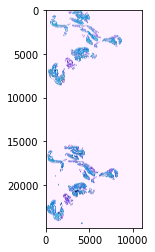

In [40]:
plt.imshow(third_img)

In [49]:
df_train["label"].value_counts()

1    547
0    207
Name: label, dtype: int64

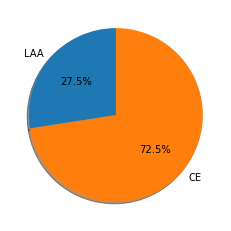

In [52]:
labels = "LAA", "CE"
counts = [207 ,547]

fig, ax = plt.subplots()
ax.pie(counts, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)
ax.axis("off")
plt.show()